# Set up

In [ ]:
data <- read.csv("brickset_brickowl_combination_forrisk.csv")
summary(data)

     setID          number          numberVariant        name          
 Min.   :   18   Length:4732        Min.   : 0.000   Length:4732       
 1st Qu.: 9067   Class :character   1st Qu.: 1.000   Class :character  
 Median :24912   Mode  :character   Median : 1.000   Mode  :character  
 Mean   :21449                      Mean   : 1.195                     
 3rd Qu.:29256                      3rd Qu.: 1.000                     
 Max.   :48337                      Max.   :22.000                     
                                                                       
      year         theme            themeGroup          subtheme        
 Min.   :1991   Length:4732        Length:4732        Length:4732       
 1st Qu.:2012   Class :character   Class :character   Class :character  
 Median :2016   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2015                                                           
 3rd Qu.:2019                                              

In [ ]:
data <- data[data$number != 5004408, ]
data <- data[complete.cases(data[ , "min_retail_price"]), ]
data <- data[complete.cases(data[ , "mean_nzd_new"]), ]
data <- data[complete.cases(data[ , "time_since_available"]), ]
data <- data[data$first_available_int > 2013, ]
data <- data[data$time_since_available > 1, ]

In [ ]:
data$pr_py <- (((data$mean_nzd_new / data$min_retail_price)^(1/data$time_since_available)) - 1)* 100

In [ ]:
data_sorted <- data[order(-data$pr_py), ]
print(head(data_sorted))

     setID number numberVariant                                      name year
4538 34025  71034            14 LEGO Minifigures - Series 23 - Sealed Box 2022
3000 27762  40197             1                   Wedding Favour Set 2018 2018
4537 33945  71034            12                      Green Dragon Costume 2022
3870 30333  71370             1                 Fire Mario Power-Up Pack  2020
4436 32241  40558             1             Clone Trooper Command Station 2022
4230 31800  71031            12               Gamora with Blade of Thanos 2021
                       theme    themeGroup              subtheme   category
4538 Collectable Minifigures Miscellaneous             Series 23 Collection
3000           Miscellaneous Miscellaneous                           Normal
4537 Collectable Minifigures Miscellaneous             Series 23     Normal
3870             Super Mario      Licensed         Power-Up Pack     Normal
4436               Star Wars      Licensed            Episode II   

# Main

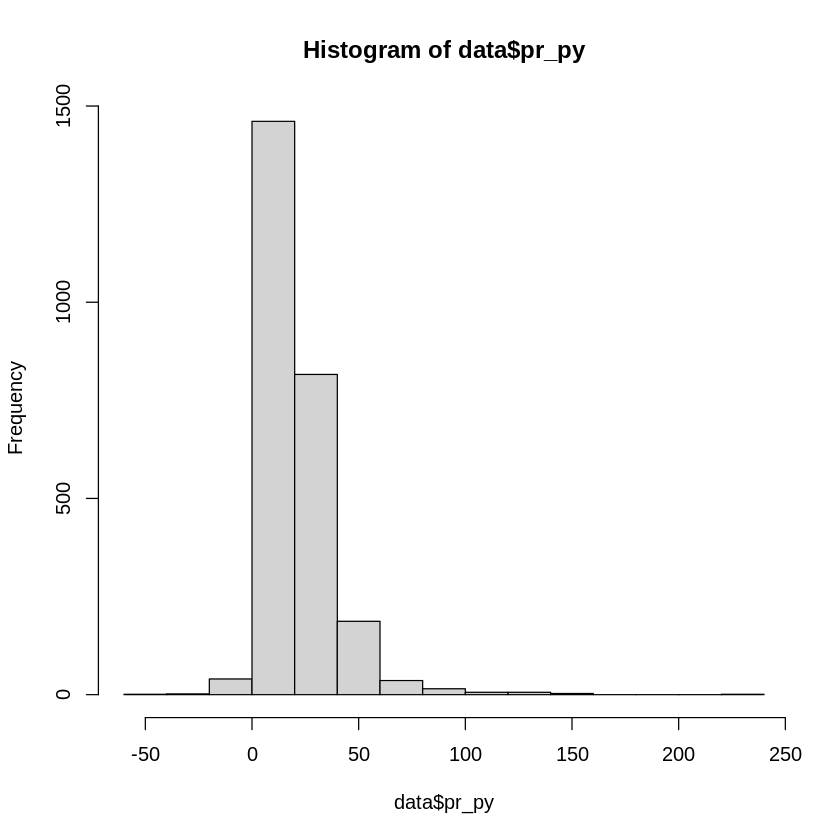

In [ ]:
hist(data$pr_py)

In [ ]:
target_data <- data[data$subtheme == "Batman", ]

std_dev <- sd(target_data$pr_py)
risk_free_rate <- 0.05
lego_return_rate <- mean(target_data$pr_py)
sharpe_ratio <- (lego_return_rate - risk_free_rate)/std_dev

In [ ]:
sharpe_ratio

[1] 1.546812

In [ ]:
std_dev

[1] 13.08257

In [ ]:
summary(data)

     setID          number          numberVariant        name          
 Min.   : 9364   Length:2574        Min.   : 1.000   Length:2574       
 1st Qu.:24701   Class :character   1st Qu.: 1.000   Class :character  
 Median :27512   Mode  :character   Median : 1.000   Mode  :character  
 Mean   :26888                      Mean   : 1.204                     
 3rd Qu.:29514                      3rd Qu.: 1.000                     
 Max.   :47005                      Max.   :22.000                     
                                                                       
      year         theme            themeGroup          subtheme        
 Min.   :2013   Length:2574        Length:2574        Length:2574       
 1st Qu.:2016   Class :character   Class :character   Class :character  
 Median :2018   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2018                                                           
 3rd Qu.:2020                                              

In [ ]:
risk_by_theme <- data.frame(themes = character(), pr_py = numeric(), sd = numeric(), sharpe = numeric(), count = integer())

unique_themes <- unique(data$theme)

risk_free_rate <- 0.05

for (theme in unique_themes) {
  theme_data <- data[data$theme == theme, ]


  pr_py_mean <- mean(theme_data$pr_py, na.rm = TRUE)
  pr_py_sd <- sd(theme_data$pr_py, na.rm = TRUE)
  sharpe_ratio <- (pr_py_mean - risk_free_rate) / pr_py_sd
  count_theme <- nrow(theme_data)

  risk_by_theme <- rbind(risk_by_theme, data.frame(
    themes = theme,
    pr_py = pr_py_mean,
    sd = pr_py_sd,
    sharpe = sharpe_ratio,
    count = count_theme
  ))
}

summary(risk_by_theme)

    themes              pr_py             sd             sharpe       
 Length:72          Min.   : 5.57   Min.   : 0.224   Min.   : 0.3068  
 Class :character   1st Qu.:13.89   1st Qu.: 6.057   1st Qu.: 1.5202  
 Mode  :character   Median :20.64   Median :10.264   Median : 2.0600  
                    Mean   :23.32   Mean   :11.944   Mean   : 4.1655  
                    3rd Qu.:27.81   3rd Qu.:13.653   3rd Qu.: 3.3878  
                    Max.   :64.54   Max.   :49.926   Max.   :60.1494  
                                    NA's   :6        NA's   :6        
     count       
 Min.   :  1.00  
 1st Qu.:  4.75  
 Median : 14.50  
 Mean   : 35.75  
 3rd Qu.: 37.00  
 Max.   :279.00  
                 

In [ ]:
avatar <- risk_by_theme[risk_by_theme$themes == "Avatar", ]
avatar

themes,pr_py,sd,sharpe,count
<chr>,<dbl>,<dbl>,<dbl>,<int>


In [ ]:
risk_by_theme_sorted <- risk_by_theme[order(-risk_by_theme$sharpe), ]
risk_by_theme_sorted <- risk_by_theme_sorted[risk_by_theme_sorted$count >= 10, ]
print(nrow(risk_by_theme_sorted))
print(risk_by_theme_sorted)

[1] 42
                    themes     pr_py        sd    sharpe count
53             Promotional 30.343455  7.190264 4.2131212    11
33          The LEGO Movie 13.006811  3.507714 3.6938046    18
30                  Mixels 19.696704  5.403202 3.6361223    68
43          Jurassic World 25.298323  7.501517 3.3657622    28
39                Bionicle 22.129908  6.668361 3.3111445    13
70              Monkie Kid 37.017355 13.654625 2.7073138    22
38                   Elves 17.948128  6.758816 2.6481157    31
1           Creator Expert 24.972210  9.852463 2.5295410    31
6                    Ideas 29.294829 11.621500 2.5164418    29
27                 Juniors 13.826089  5.917717 2.3279398    34
41         Speed Champions 41.646387 18.140416 2.2930228    42
50  The LEGO Ninjago Movie 19.258685  8.464049 2.2694439    17
5             Architecture 27.551205 12.166275 2.2604457    27
51              BrickHeadz 46.592040 20.655863 2.2532120    92
7                Minecraft 24.354032 10.822838 2

In [ ]:
risk_by_subtheme <- data.frame(subthemes = character(), pr_py = numeric(), sd = numeric(), sharpe = numeric(), count = integer())

unique_themes <- unique(data$subtheme)

risk_free_rate <- 0.05

for (subtheme in unique_themes) {
  subtheme_data <- data[data$subtheme == subtheme, ]


  pr_py_mean <- mean(subtheme_data$pr_py, na.rm = TRUE)
  pr_py_sd <- sd(subtheme_data$pr_py, na.rm = TRUE)
  sharpe_ratio <- (pr_py_mean - risk_free_rate) / pr_py_sd
  count_subtheme <- nrow(subtheme_data)

  risk_by_subtheme <- rbind(risk_by_subtheme, data.frame(
    subthemes = subtheme,
    pr_py = pr_py_mean,
    sd = pr_py_sd,
    sharpe = sharpe_ratio,
    count = count_subtheme
  ))
}

summary(risk_by_subtheme)

  subthemes             pr_py              sd               sharpe       
 Length:395         Min.   :-10.93   Min.   : 0.04541   Min.   : -5.789  
 Class :character   1st Qu.: 14.26   1st Qu.: 4.64314   1st Qu.:  1.808  
 Mode  :character   Median : 19.96   Median : 7.38346   Median :  2.432  
                    Mean   : 24.12   Mean   : 9.48311   Mean   :  7.016  
                    3rd Qu.: 28.04   3rd Qu.:11.42202   3rd Qu.:  3.829  
                    Max.   :141.83   Max.   :87.02539   Max.   :567.533  
                                     NA's   :110        NA's   :110      
     count        
 Min.   :  1.000  
 1st Qu.:  1.000  
 Median :  3.000  
 Mean   :  6.516  
 3rd Qu.:  7.000  
 Max.   :357.000  
                  

In [ ]:
risk_by_subtheme_sorted <- risk_by_subtheme[order(-risk_by_subtheme$sharpe), ]
risk_by_subtheme_sorted <- risk_by_subtheme_sorted[risk_by_subtheme_sorted$count >= 3, ]
print(nrow(risk_by_subtheme_sorted))
print(risk_by_subtheme_sorted)

[1] 223
                             subthemes      pr_py         sd     sharpe count
42                          Planet Set  17.856168  0.9702485 18.3521715     3
231     Jurassic World: Fallen Kingdom  15.289409  0.9035872 16.8654540     3
1         Modular Buildings Collection  27.668485  1.6924906 16.3182498     6
89                              2 in 1  11.730527  1.0056552 11.6148427     4
250                    Wizarding World  45.795984  4.9263963  9.2858920     5
85                       Legend Beasts  15.677838  1.6876804  9.2599514     4
222     Guardians of the Galaxy Vol. 2  24.532363  2.7734251  8.8274832     3
159                           Series 8  23.980268  2.8462293  8.4077092     8
104      The Battle of the Five Armies  23.681631  2.8252356  8.3644814     4
118                           Series 4  16.146206  1.9794362  8.1317124     9
125                        Tribe Packs  11.294200  1.4764774  7.6155582     3
120                           Series 6  24.406862  3.236

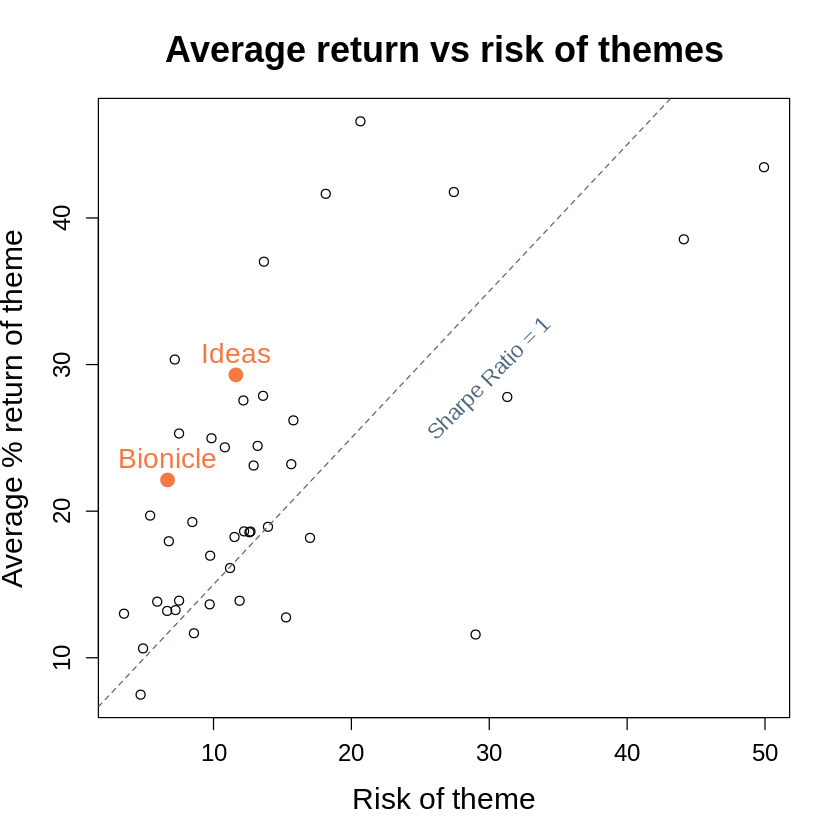

In [ ]:
plot(risk_by_theme_sorted$sd, risk_by_theme_sorted$pr_py, xlab="Risk of theme", ylab="Average % return of theme", main="Average return vs risk of themes",
    cex.lab = 1.5, cex.axis=1.2, cex.main=1.8)

abline(a = 5, b = 1, col = "#4f6980", lwd = 1, lty = 2)
text(x = 25, y = 25, labels = "Sharpe Ratio = 1", pos = 4, srt=45, col = "#4f6980", cex=1.1)

labels = c("Ideas", "Bionicle")
select_text <- risk_by_theme_sorted[risk_by_theme_sorted$theme %in% labels, ]
points(select_text$sd, select_text$pr_py, col = "#f47942", pch = 19, cex = 1.5)
text(select_text$sd, select_text$pr_py, labels=select_text$theme, pos=3, col="#f47942", cex=1.4)

# Future data

In [ ]:
future_data <- read.csv("predictions_data.csv")
head(future_data)
nrow(future_data)

,availability,currency,ean,name,pieces_count,released_date,retail_price_au,retail_price_ca,retail_price_eu,retail_price_uk,⋯,review_pos,review_comp,pieces,time_available,pieces_x_retail_price,time_since_available,pieces_x_retail_price_x_time_since_available,time_since_available_x_pieces,time_since_available_x_retail_price,yr5_pred
,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,exclusive,USD,5.702017e+12,ECTO-1,2352,2020-11-16,369.99,299.99,239.99,209.99,⋯,0.1412857,0.8957857,2352,4.122951,846172.0,5,4230860,11760,1798.8350,18.69732
2,retail,USD,5.702017e+12,Space Shuttle Discovery,2354,2021-04-01,299.99,269.99,199.99,169.99,⋯,0.1678077,0.9523923,2354,3.750685,762199.5,5,3810998,11770,1618.9455,18.97887
3,exclusive,USD,5.702017e+12,Loop Coaster,3756,2022-07-01,599.99,499.99,399.99,344.99,⋯,0.1678077,0.9523923,3756,2.501370,2252171.4,5,11260857,18780,2998.0983,18.89676
4,exclusive,USD,5.702017e+12,Chevrolet Camaro Z/28 1969,1456,2022-08-01,249.99,209.99,169.99,149.99,⋯,0.1678077,0.9523923,1456,2.416438,366669.3,5,1833346,7280,1259.1665,18.89676
5,exclusive,USD,5.702017e+12,Atari 2600,2532,2022-08-01,369.99,299.99,239.99,209.99,⋯,0.1678077,0.9523923,2532,2.416438,910930.0,5,4554650,12660,1798.8350,18.89676
6,retail,USD,5.702017e+12,Holiday Main Street,1514,2022-10-03,169.99,129.99,99.99,89.99,⋯,0.1678077,0.9523923,1514,2.243836,236020.8,5,1180104,7570,779.4612,19.14458


[1] 362

In [ ]:
theme <- future_data$theme[200]
theme_data <- risk_by_theme[risk_by_theme$themes == "Star Wars", ]
theme_data
theme

,themes,pr_py,sd,sharpe,count
,<chr>,<dbl>,<dbl>,<dbl>,<int>
6,Star Wars,0.3992278,0.3008668,1.160739,421


[1] "Minecraft"

In [ ]:
future_data$theme_sd <- NA
future_data$theme <- factor(future_data$theme)

for (i in 1:362) {
    theme <- future_data$theme[i]
    theme_data <- risk_by_theme[risk_by_theme$themes == theme, ]
    if (nrow(theme_data) == 1){
      if (theme_data$count >= 5) {
      future_data$theme_sd[i] <- theme_data$sd
      }
    }
}

for (i in 5:5) {
    var <- paste0("yr", i, "_pred")
    sharpe_var <- paste0("sharpe", i, "yr")
    risk_free_rate <- 0.05
    future_data[[sharpe_var]] <- (future_data[[var]] - risk_free_rate) / future_data$theme_sd
}

head(future_data)

,availability,currency,ean,name,pieces_count,released_date,retail_price_au,retail_price_ca,retail_price_eu,retail_price_uk,⋯,pieces,time_available,pieces_x_retail_price,time_since_available,pieces_x_retail_price_x_time_since_available,time_since_available_x_pieces,time_since_available_x_retail_price,yr5_pred,theme_sd,sharpe5yr
,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,exclusive,USD,5.702017e+12,ECTO-1,2352,2020-11-16,369.99,299.99,239.99,209.99,⋯,2352,4.122951,846172.0,5,4230860,11760,1798.8350,18.69732,NA,NA
2,retail,USD,5.702017e+12,Space Shuttle Discovery,2354,2021-04-01,299.99,269.99,199.99,169.99,⋯,2354,3.750685,762199.5,5,3810998,11770,1618.9455,18.97887,10.67497,1.773202
3,exclusive,USD,5.702017e+12,Loop Coaster,3756,2022-07-01,599.99,499.99,399.99,344.99,⋯,3756,2.501370,2252171.4,5,11260857,18780,2998.0983,18.89676,10.67497,1.765510
4,exclusive,USD,5.702017e+12,Chevrolet Camaro Z/28 1969,1456,2022-08-01,249.99,209.99,169.99,149.99,⋯,1456,2.416438,366669.3,5,1833346,7280,1259.1665,18.89676,10.67497,1.765510
5,exclusive,USD,5.702017e+12,Atari 2600,2532,2022-08-01,369.99,299.99,239.99,209.99,⋯,2532,2.416438,910930.0,5,4554650,12660,1798.8350,18.89676,10.67497,1.765510
6,retail,USD,5.702017e+12,Holiday Main Street,1514,2022-10-03,169.99,129.99,99.99,89.99,⋯,1514,2.243836,236020.8,5,1180104,7570,779.4612,19.14458,10.67497,1.788725


In [ ]:
sorted_future_data <- future_data[order(-future_data$sharpe5yr), ]
best_recommendations <- sorted_future_data[sorted_future_data$min_retail_price >= 100, ]
df_subset <- best_recommendations[, c("name", "theme", "set_number", "yr5_pred", "sharpe5yr", "theme_sd")]
write.csv(df_subset, "best_recommendations.csv", row.names = FALSE)

In [ ]:
df_subset <- df_subset[complete.cases(df_subset[ , "sharpe5yr"]), ]
head(df_subset, 5)
tail(df_subset, 5)

,name,theme,set_number,yr5_pred,sharpe5yr,theme_sd
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
296,Brachiosaurus Discovery,Jurassic World,76960-1,19.64031,2.611513,7.501517
50,Giganotosaurus & Therizinosaurus Attack,Jurassic World,76949-1,19.31378,2.567985,7.501517
196,Visitor Center: T. rex & Raptor Attack,Jurassic World,76961-1,19.06156,2.534362,7.501517
15,Sonic the Hedgehog - Green Hill Zone,Ideas,21331-1,26.09898,2.241447,11.621500
16,BTS Dynamite,Ideas,21339-1,25.68255,2.205614,11.621500


,name,theme,set_number,yr5_pred,sharpe5yr,theme_sd
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
244,Super Mario 64 Question Mark Block,Super Mario,71395-1,11.162736,0.3549668,31.30641
133,Princess Peach's Castle,Super Mario,71408-1,10.803227,0.3434832,31.30641
137,Larry's and Morton's Airships,Super Mario,71427-1,10.620702,0.3376530,31.30641
54,Diddy Kong's Mine Cart Ride Expansion Set,Super Mario,71425-1,9.953202,0.3163315,31.30641
279,Dry Bowser Castle Battle Expansion Set,Super Mario,71423-1,9.953202,0.3163315,31.30641


In [ ]:
mean(head(df_subset, 20)$yr5_pred)
mean(head(df_subset, 20)$sharpe5yr)
mean(head(df_subset, 20)$theme_sd)

[1] 24.86554

[1] 2.156982

[1] 11.67516